# importing libraries

In [1]:
import requests 
from bs4 import BeautifulSoup 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import geopandas as gpd

# reading data

In [42]:
import pandas as pd
URL = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml#"

dfs = pd.read_html(URL)

# State Wise analysis of Confirmed,Deaths and recovered cases

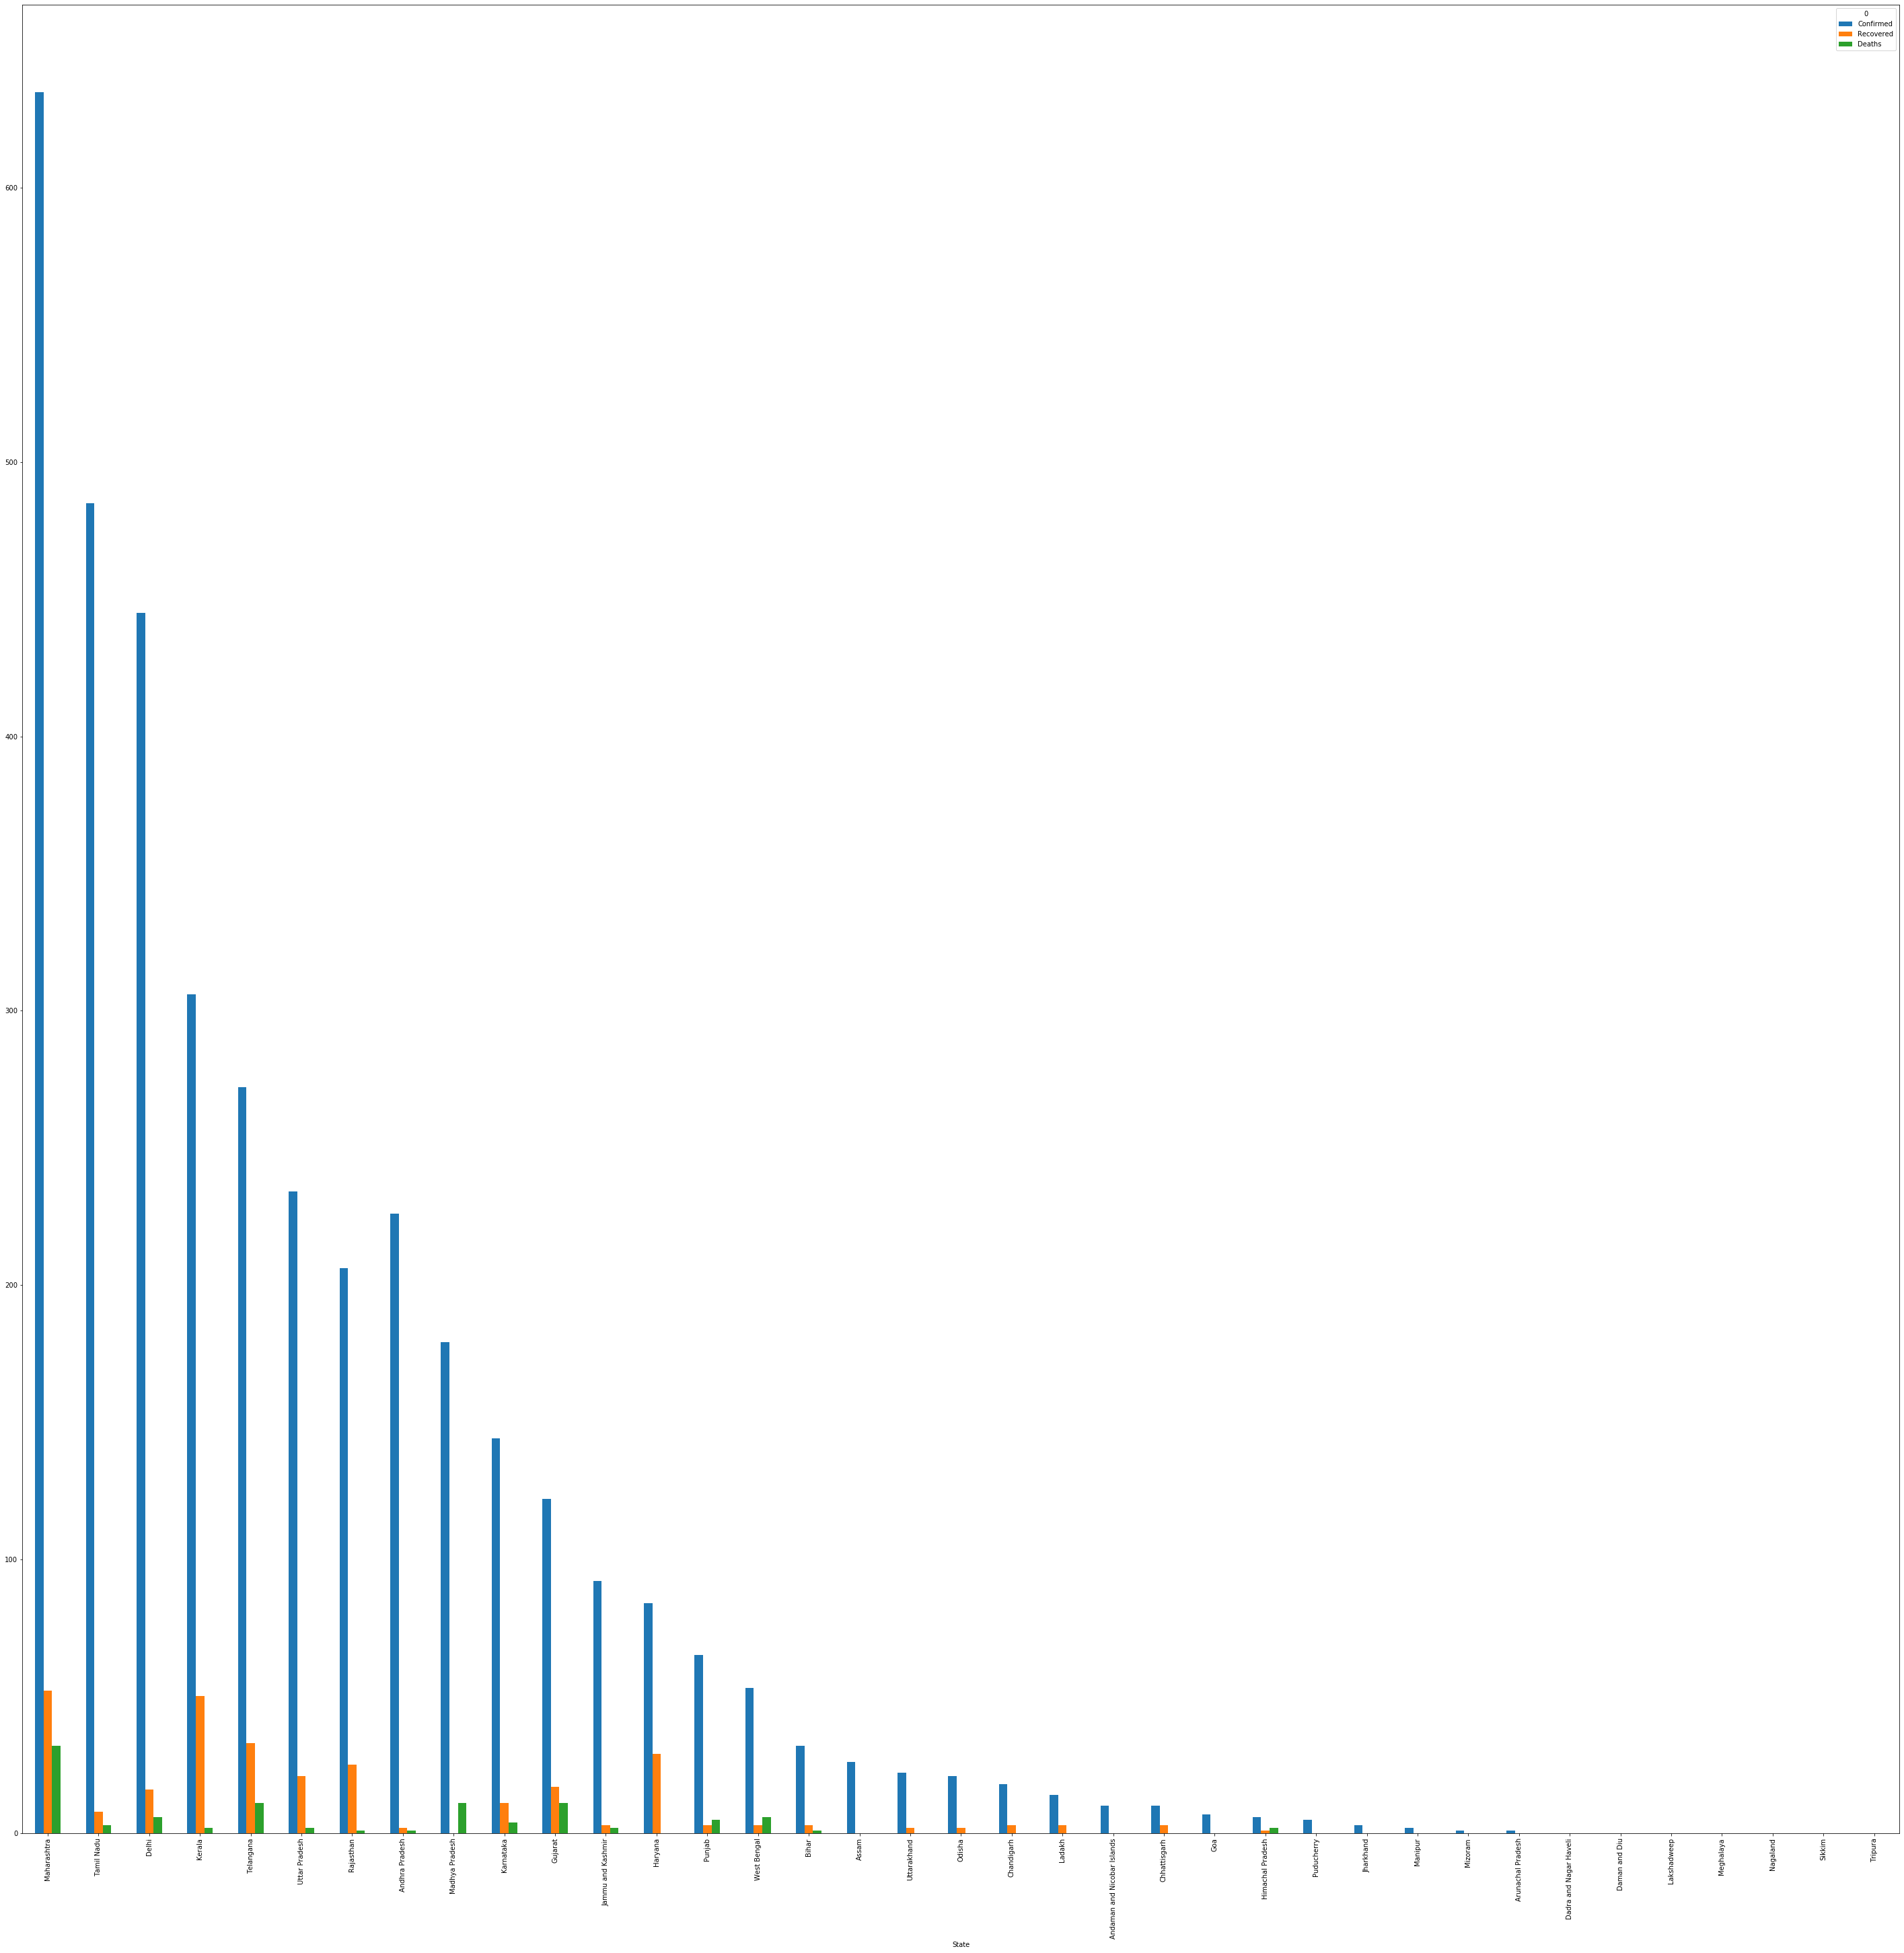

In [70]:
state_wise=dfs[3].copy()
state_wise.columns=state_wise.iloc[0,:]
state_wise.drop([0,1,2],inplace=True)
state_wise.drop([1.0],axis=1,inplace=True)
state_wise.dropna(axis='columns',inplace=True)
state_wise=state_wise.iloc[:,:-3]
state_wise["Confirmed"]=state_wise["Confirmed"].astype("int")
state_wise["Recovered"]=state_wise["Recovered"].astype("int")
state_wise["Deaths"]=state_wise["Deaths"].astype("int")
state_wise.plot(x=0,kind="bar",figsize=(50,50))

# time series analysis of states wise cases

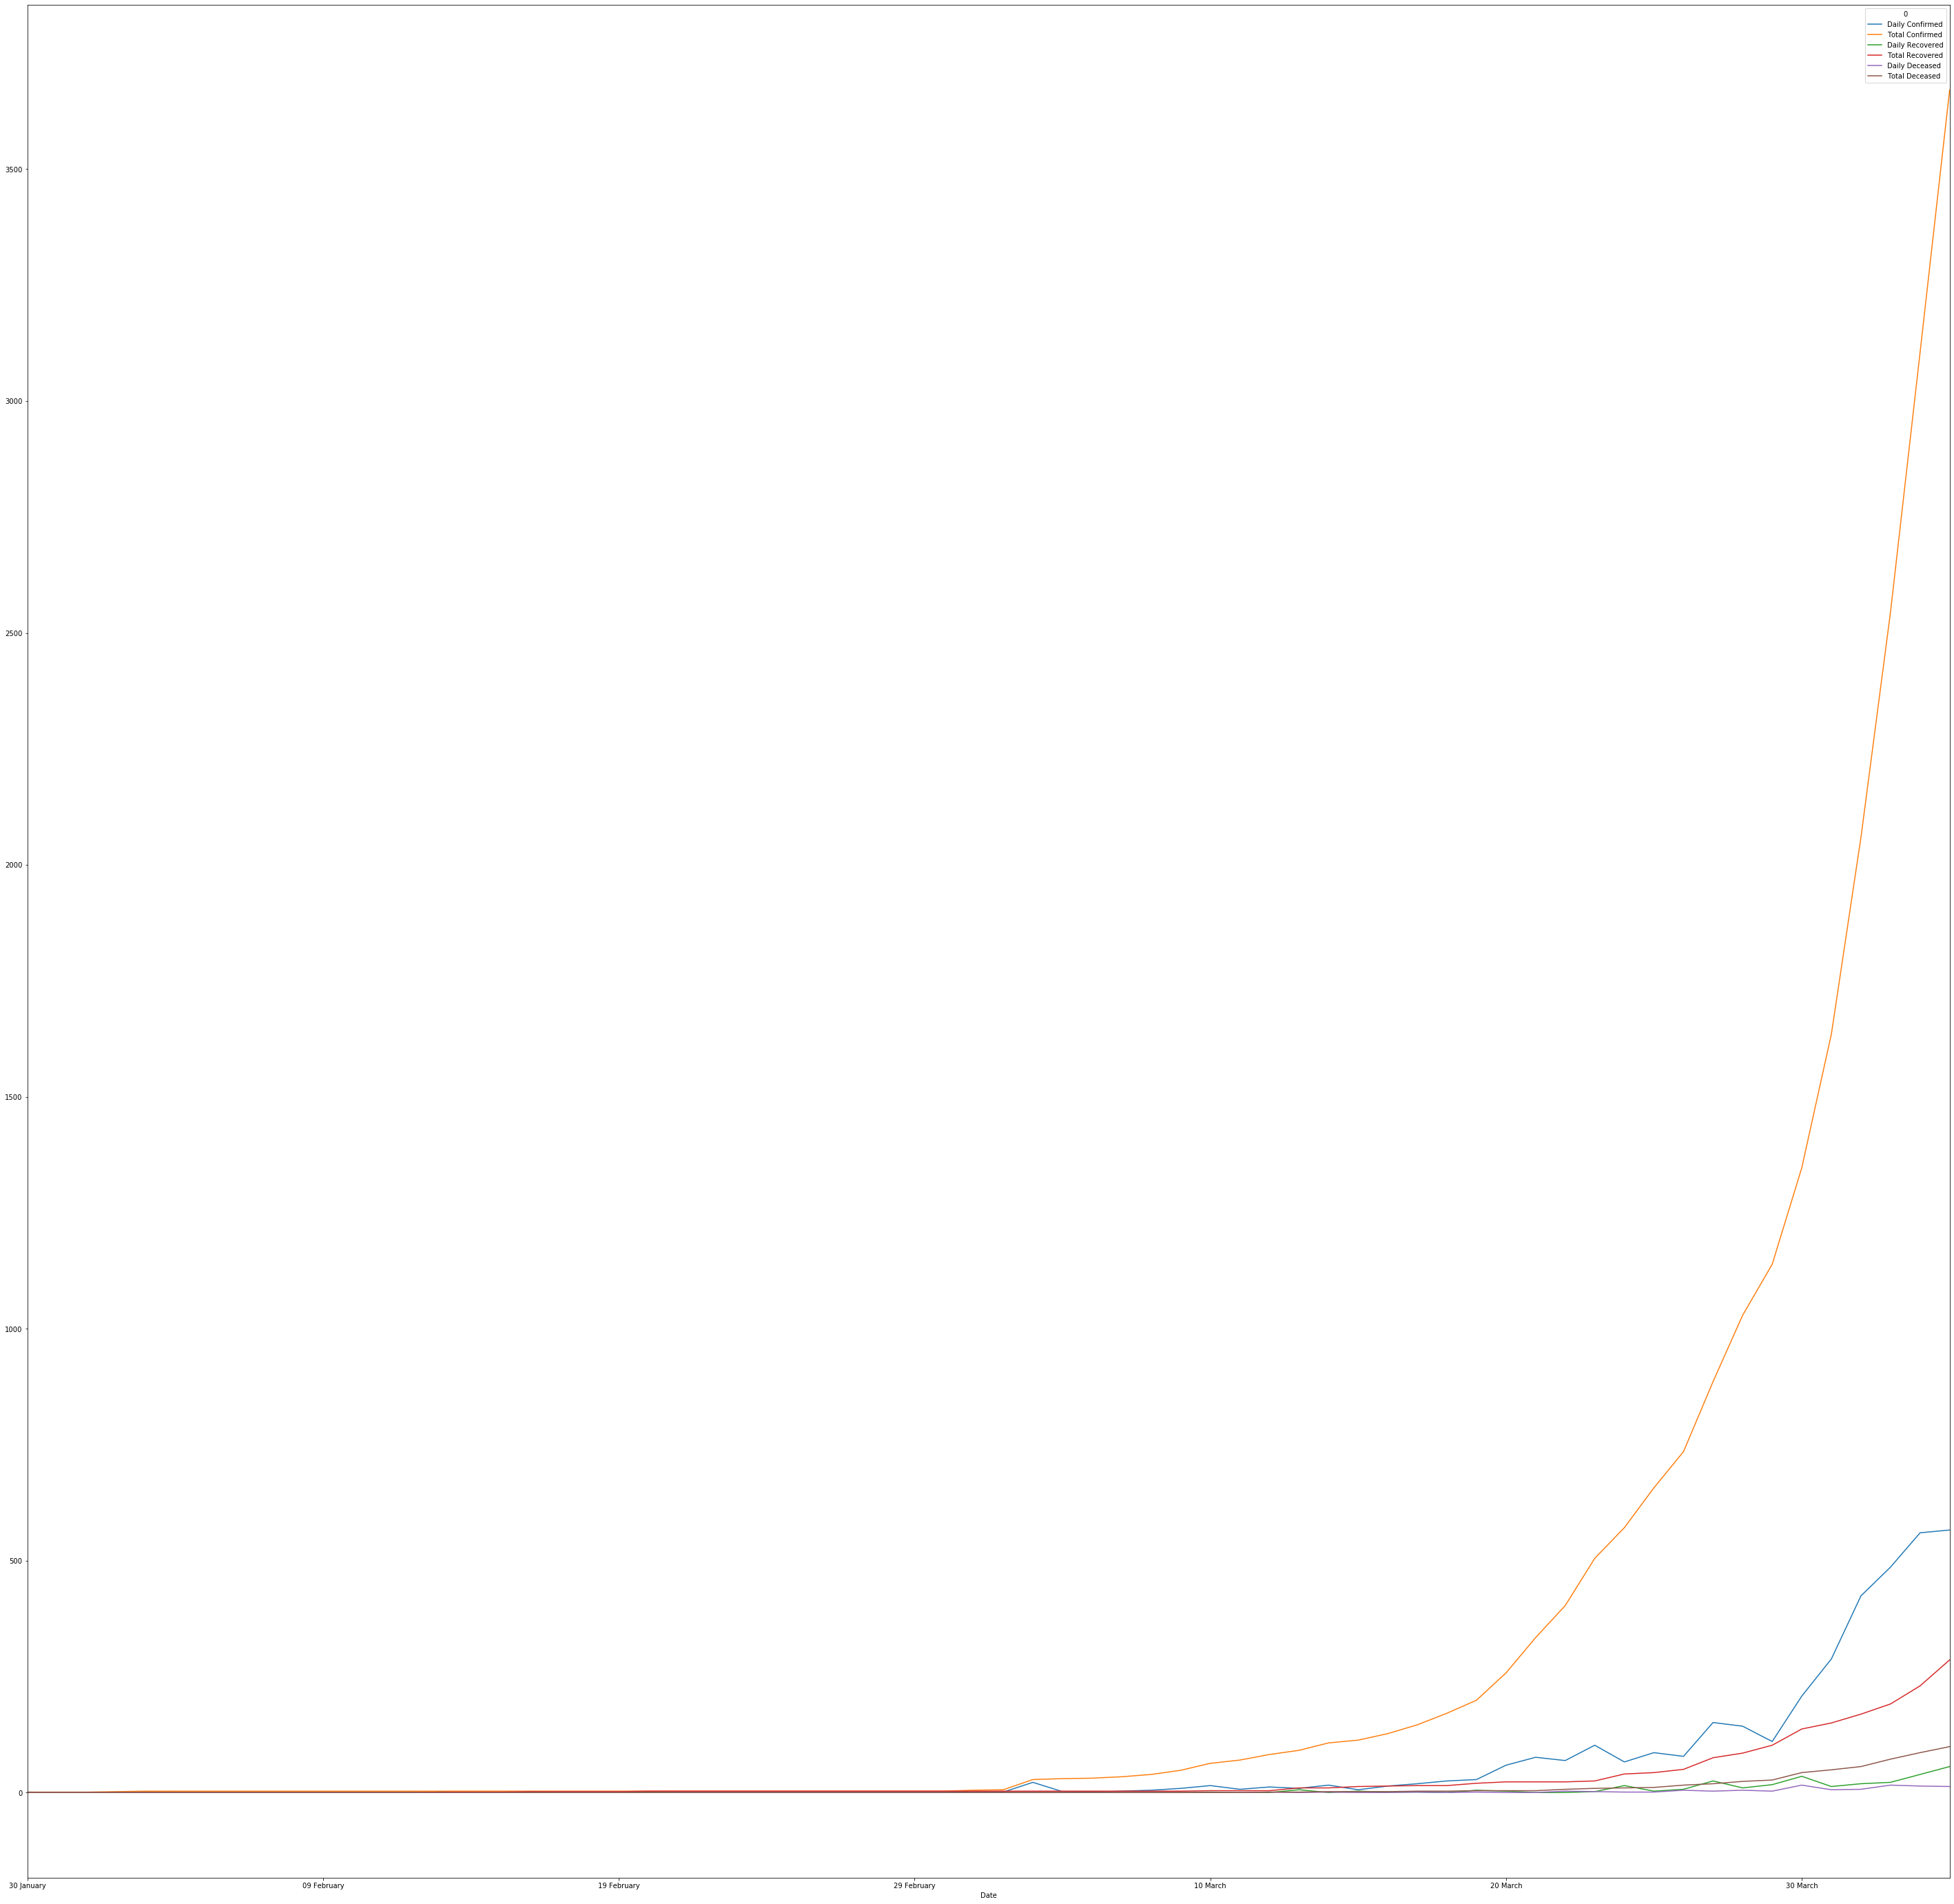

In [101]:
time_Series=dfs[5].copy()
time_Series.columns=time_Series.iloc[0,:]
time_Series.drop([0],inplace=True)
time_Series.drop([1.0],axis=1,inplace=True)
time_Series.dropna(inplace=True)
for i in time_Series.columns[1:]:
    time_Series[i]=time_Series[i].astype("int")
time_Series.plot(x=0,kind="line",figsize=(50,50))

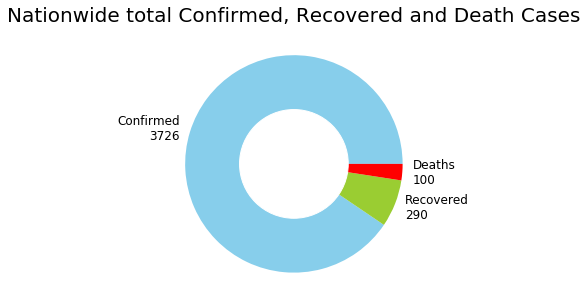

In [118]:
group_size = [sum(state_wise["Confirmed"]),
              sum(state_wise["Recovered"]),
              sum(state_wise["Deaths"])]
group_labels = ["Confirmed\n" + str(sum(state_wise["Confirmed"])),
                "Recovered\n" + str(sum(state_wise["Recovered"])),
                "Deaths\n" + str(sum(state_wise["Deaths"]))]
custom_colors = ["skyblue","yellowgreen","red"]
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color ="white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc("font", size = 12)
plt.title("Nationwide total Confirmed, Recovered and Death Cases", fontsize = 20)
plt.show()

# Mapping Confirmed cases with states in map using geopandas

In [129]:
map_data = gpd.read_file("Indian_States.shp")
map_data.rename(columns = {"st_nm":"State"}, inplace = True)
map_data["State"] = map_data["State"].str.replace("&","and")
map_data["State"].replace("Arunanchal Pradesh",
                              "Arunachal Pradesh", inplace = True)
map_data["State"].replace("Telangana", 
                              "Telengana", inplace = True)
map_data["State"].replace("NCT of Delhi", 
                              "Delhi", inplace = True)
map_data["State"].replace("Andaman and Nicobar Island", 
                              "Andaman and Nicobar Islands", 
                               inplace = True)
map_data.head()

,State,geometry
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [130]:
merged_data = pd.merge(map_data, state_wise, 
                       how = "left", on = "State")
merged_data.fillna(0, inplace = True)
merged_data.head()

,State,geometry,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,State_code
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",10.0,0.0,0.0,10,30/03/2020 11:27:27,AN
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1.0,0.0,0.0,1,02/04/2020 11:42:31,AR
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",26.0,0.0,0.0,26,05/04/2020 00:48:26,AS
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",32.0,3.0,1.0,28,04/04/2020 20:06:26,BR
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",18.0,3.0,0.0,15,05/04/2020 00:40:27,CH


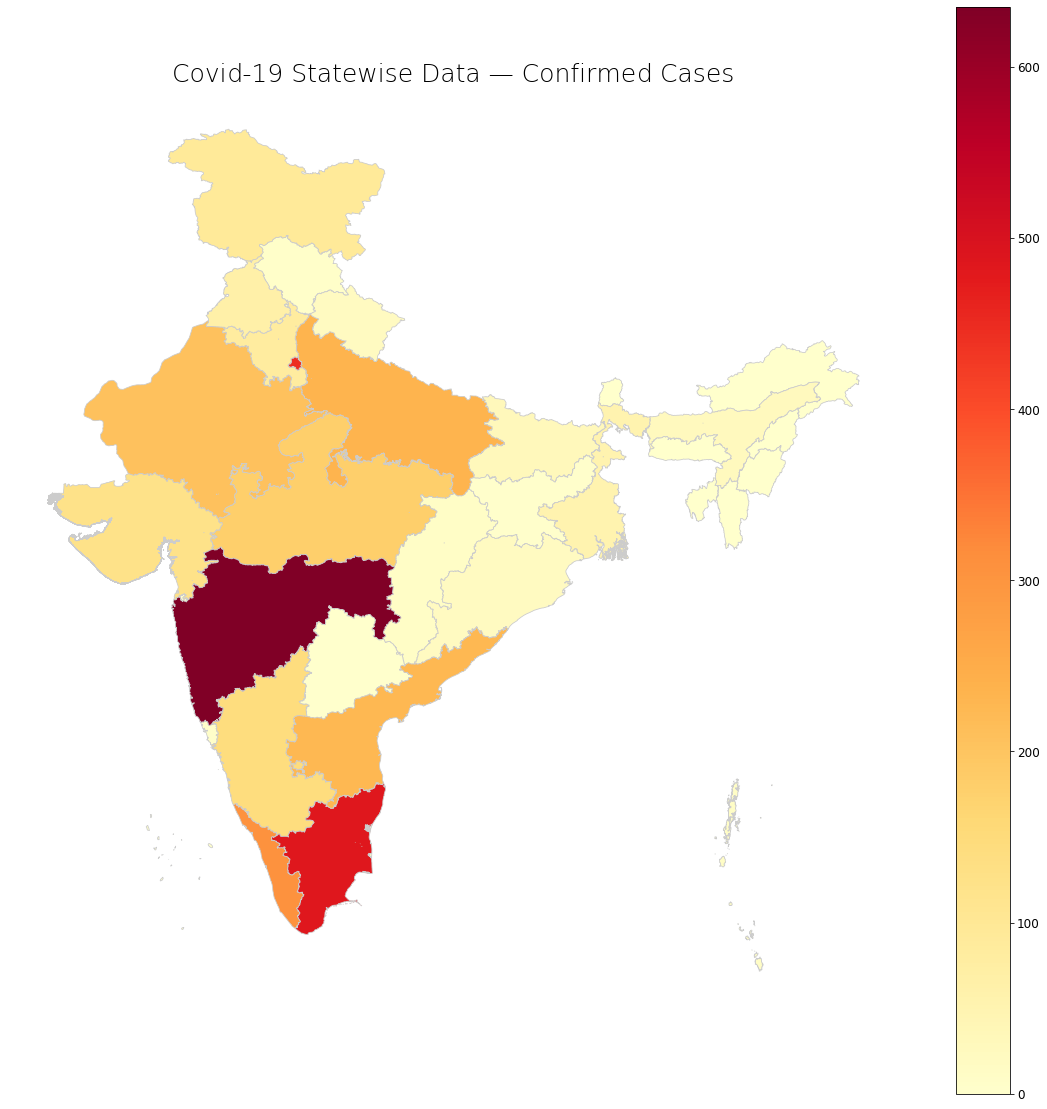

In [137]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.axis("off")
ax.set_title("Covid-19 Statewise Data — Confirmed Cases", 
             fontdict =  {"fontsize": "25", "fontweight" : "5"})
merged_data.plot(column = "Confirmed", cmap="YlOrRd", 
                 linewidth=0.8, ax=ax, edgecolor="0.8", 
                 legend = True)
plt.show()